# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import cv2


In [2]:
from google.colab import drive

In [3]:
drive.mount(r'/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
PATH = '/content/drive/MyDrive/notebooks/dataset/medical_images'

# Load data

[]

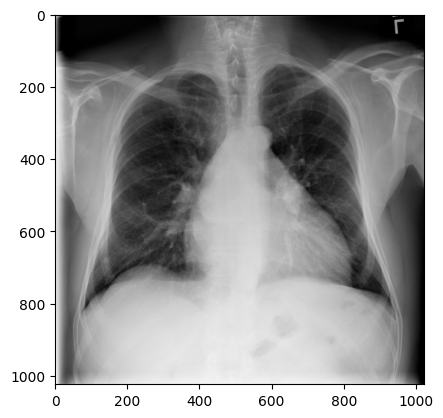

In [5]:
image = cv2.imread(os.path.join(PATH,'images','00000001_000.png'))
plt.imshow(image)
plt.plot()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
df = pd.read_csv(os.path.join(PATH,'dataset.csv'))
files = os.listdir(os.path.join(PATH, 'images/'))
files = list(filter(lambda x: x.endswith('.png'), files))
df = df.loc[df['Image Index'].isin(files),:]

df['Finding Labels'] = df['Finding Labels'].map({"No Finding": 0}, na_action = None).fillna(1).astype(str)
image_list= df['Image Index']

<ipython-input-7-748e4baa1b37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Finding Labels'] = df['Finding Labels'].map({"No Finding": 0}, na_action = None).fillna(1).astype(str)


In [8]:
train_df, test_df = train_test_split(df)

In [9]:
train_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

In [10]:
batch_size = 1

train_data_gen = train_generator.flow_from_dataframe(
    train_df,
    os.path.join(PATH,'images'),
    'Image Index',
    'Finding Labels',
    class_mode='binary',
    shuffle=True,
    target_size=(400, 400),
  batch_size=batch_size,
    color_mode='grayscale'

)


test_data_gen = test_generator.flow_from_dataframe(
    test_df,
    os.path.join(PATH,'images'),
    'Image Index',
    'Finding Labels',
    class_mode='binary' ,
    shuffle=True,
    target_size=(400, 400),
    batch_size=batch_size,
    color_mode='grayscale'


)

Found 1776 validated image filenames belonging to 2 classes.
Found 593 validated image filenames belonging to 2 classes.


In [11]:
sample_batch = next(train_data_gen)

sample_batch[0].shape

(1, 400, 400, 1)

In [12]:
sample_batch

(array([[[[0.14509805],
          [0.14509805],
          [0.14901961],
          ...,
          [0.2509804 ],
          [0.29411766],
          [0.16078432]],
 
         [[0.14117648],
          [0.13725491],
          [0.14509805],
          ...,
          [0.23529413],
          [0.28235295],
          [0.14901961]],
 
         [[0.14117648],
          [0.14117648],
          [0.14117648],
          ...,
          [0.23529413],
          [0.2784314 ],
          [0.15294118]],
 
         ...,
 
         [[0.16078432],
          [0.15686275],
          [0.15294118],
          ...,
          [0.3019608 ],
          [0.36862746],
          [0.20000002]],
 
         [[0.18039216],
          [0.18039216],
          [0.17254902],
          ...,
          [0.3254902 ],
          [0.3921569 ],
          [0.21568629]],
 
         [[0.20784315],
          [0.20392159],
          [0.21176472],
          ...,
          [0.3529412 ],
          [0.42352945],
          [0.23137257]]]], dtype=float3

In [13]:
conv_model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')

])

In [14]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.BinaryCrossentropy(),
                   metrics=['accuracy'])

In [ ]:
training_hist = conv_model.fit(train_data_gen,
                               epochs=50,
                               steps_per_epoch=len(train_df) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_df) // batch_size)

Epoch 1/50
1776/1776 [==============================] - 278s 144ms/step - loss: 0.8243 - accuracy: 0.4792 - val_loss: 0.6934 - val_accuracy: 0.4890
Epoch 2/50
1776/1776 [==============================] - 246s 139ms/step - loss: 0.7065 - accuracy: 0.4989 - val_loss: 0.6935 - val_accuracy: 0.4823
Epoch 3/50
1776/1776 [==============================] - 246s 138ms/step - loss: 0.7068 - accuracy: 0.5107 - val_loss: 0.6928 - val_accuracy: 0.5143
Epoch 4/50
1776/1776 [==============================] - 247s 139ms/step - loss: 0.7028 - accuracy: 0.5011 - val_loss: 0.6928 - val_accuracy: 0.5143
Epoch 5/50
 824/1776 [============>.................] - ETA: 2:04 - loss: 0.6955 - accuracy: 0.4745